In [6]:
import pandas as pd

In [7]:
file_path = '../data/Layoffs_Dataset.csv'

In [8]:
df = pd.read_csv(file_path)

In [9]:
df.head()

,Company Name,Industry,Layoff Count,Date of Layoff,Reason,City,Funding Status,Source URL
0,Paytm,Fintech,3500,2024,RBI ban on Paytm Payments Bank services,Noida,Public,Storyboard18
1,Flipkart,E-commerce,1100–1500,Jan 2024,Restructuring and cost management,Bengaluru,Acquired by Walmart,Storyboard18
2,Byju's,Edtech,500,Apr 2024,Financial crunch and legal disputes,Bengaluru,Private,Economic Times
3,Swiggy,Food Delivery,400,2024,Cost-cutting measures,Bengaluru,Private,Storyboard18
4,Ola Electric,Automotive,300–400,Nov 2024,Cost-cutting drive,Bengaluru,Private,Economic Times


In [10]:
#Data Cleaning & Preprocessing

In [11]:
import numpy as np

In [13]:
# Convert "Layoff Count" ranges to numeric averages
def convert_layoff_count(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    if '–' in value:  # en dash
        try:
            low, high = map(int, value.replace(',', '').split('–'))
            return (low + high) / 2
        except:
            return np.nan
    elif '-' in value:  # hyphen
        try:
            low, high = map(int, value.replace(',', '').split('-'))
            return (low + high) / 2
        except:
            return np.nan
    elif '%' in value or not value.isdigit():
        return np.nan
    else:
        return float(value)

df['Layoff Count Clean'] = df['Layoff Count'].apply(convert_layoff_count)

# Extract year from 'Date of Layoff'
df['Layoff Year'] = pd.to_datetime(df['Date of Layoff'], errors='coerce').dt.year
df['Layoff Year'] = df['Layoff Year'].fillna(
    df['Date of Layoff'].str.extract(r'(\d{4})')[0].astype(float)
)

df.head()

,Company Name,Industry,Layoff Count,Date of Layoff,Reason,City,Funding Status,Source URL,Layoff Count Clean,Layoff Year
0,Paytm,Fintech,3500,2024,RBI ban on Paytm Payments Bank services,Noida,Public,Storyboard18,3500.0,2024.0
1,Flipkart,E-commerce,1100–1500,Jan 2024,Restructuring and cost management,Bengaluru,Acquired by Walmart,Storyboard18,1300.0,2024.0
2,Byju's,Edtech,500,Apr 2024,Financial crunch and legal disputes,Bengaluru,Private,Economic Times,500.0,2024.0
3,Swiggy,Food Delivery,400,2024,Cost-cutting measures,Bengaluru,Private,Storyboard18,400.0,2024.0
4,Ola Electric,Automotive,300–400,Nov 2024,Cost-cutting drive,Bengaluru,Private,Economic Times,350.0,2024.0


In [14]:
#Exploratory Data Analysis (EDA)

In [15]:
import matplotlib.pyplot as plt

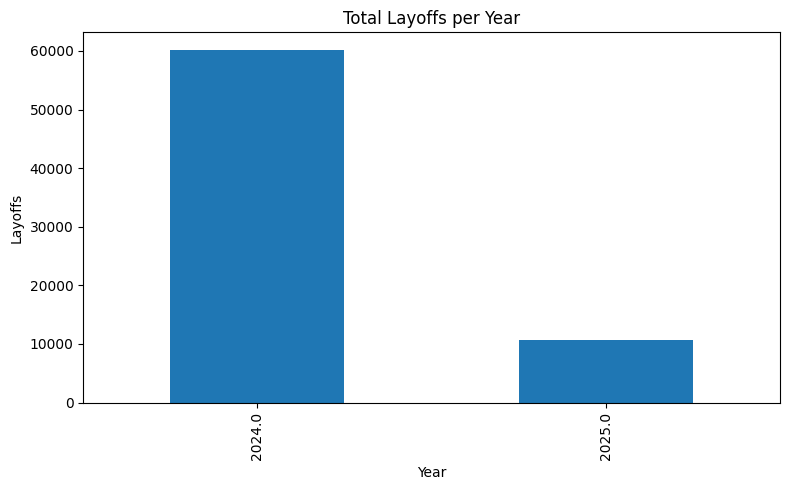

In [16]:
# Bar Chart: Total layoffs per year
yearly_layoffs = df.groupby('Layoff Year')['Layoff Count Clean'].sum()
yearly_layoffs.plot(kind='bar', title='Total Layoffs per Year', xlabel='Year', ylabel='Layoffs', figsize=(8,5))
plt.tight_layout()
plt.show()

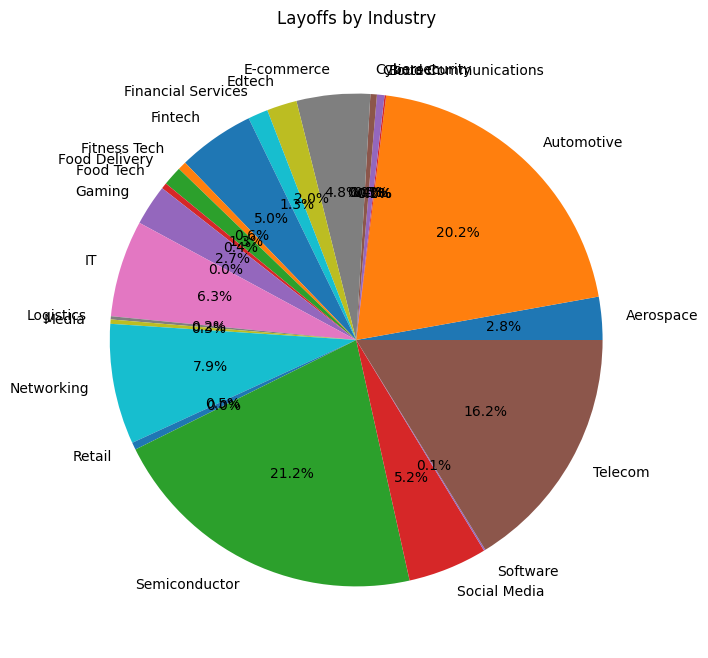

In [17]:
# Pie Chart: Percentage layoffs by industry
industry_layoffs = df.groupby('Industry')['Layoff Count Clean'].sum()
industry_layoffs.dropna().plot(kind='pie', autopct='%1.1f%%', title='Layoffs by Industry', figsize=(8,8))
plt.ylabel('')
plt.show()

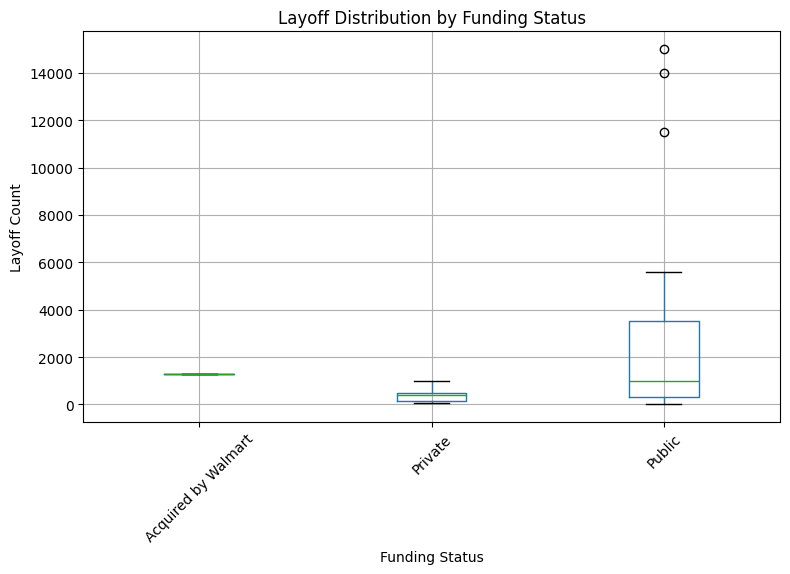

In [18]:
# Boxplot: Layoff counts by Funding Status
df.boxplot(column='Layoff Count Clean', by='Funding Status', figsize=(8,6))
plt.title('Layoff Distribution by Funding Status')
plt.suptitle('')
plt.xlabel('Funding Status')
plt.ylabel('Layoff Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()